In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

X = pd.DataFrame(data=digits.data, columns=digits.feature_names)
Y = pd.DataFrame(digits.target, columns=['target'])

C:\Users\ahmad\AppData\Local\Temp\ipykernel_30268\407284439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Y['target'].value_counts(), palette= 'rainbow')


Text(0, 0.5, 'Frequency')

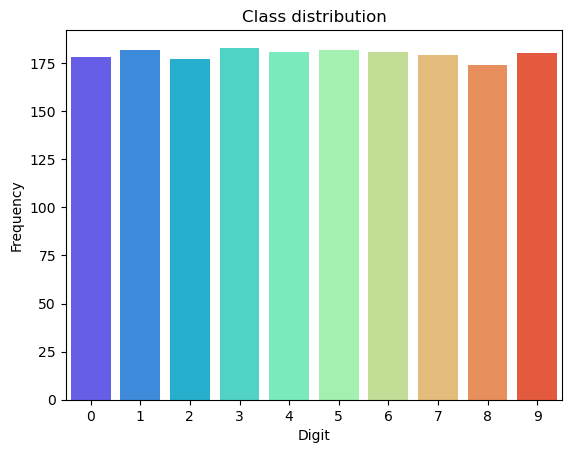

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(Y['target'].value_counts(), palette= 'rainbow')
plt.title('Class distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')

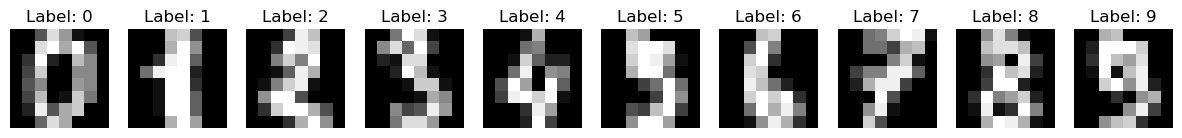

In [3]:

fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].to_numpy().reshape(8,8), cmap='gray')
    ax.axis('off')  # Turn off axis for better visualization
    ax.set_title(f"Label: {digits.target[i]}")


C:\Users\ahmad\AppData\Local\Temp\ipykernel_30268\357493618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = range(10), y = mean_intensity,palette='tab10' )


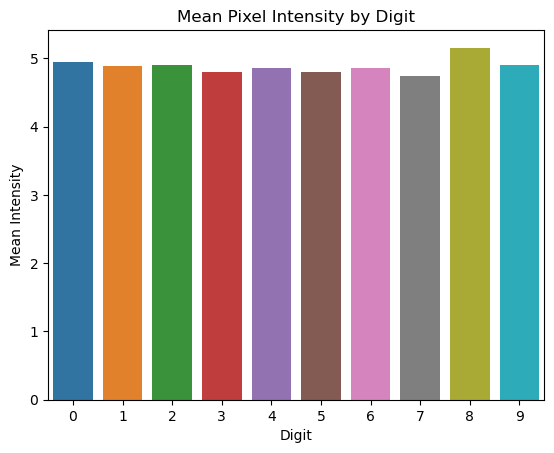

In [4]:
mean_intensity = [np.mean(digits.images[digits.target == i]) for i in range(10)]
sns.barplot(x = range(10), y = mean_intensity,palette='tab10' )
plt.title("Mean Pixel Intensity by Digit")
plt.xlabel("Digit")
plt.ylabel("Mean Intensity")
plt.show()

Class intensity:


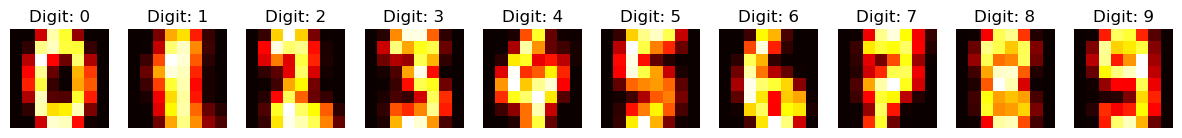

In [5]:
mean_images = [np.mean(digits.images[digits.target == i], axis=0) for i in range(10)]
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(mean_images[i], cmap='hot')
    ax.axis('off')
    ax.set_title(f"Digit: {i}")
print('Class intensity:')
plt.show()


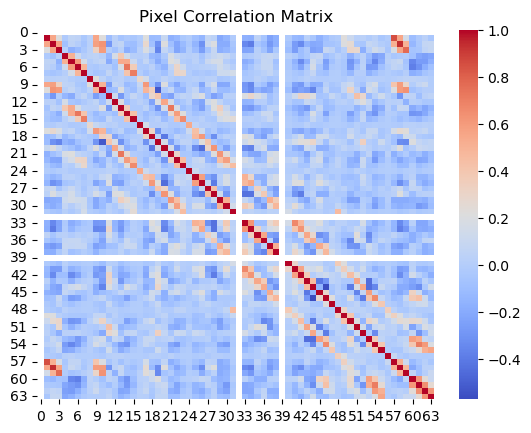

In [6]:
corr_matrix = pd.DataFrame(digits.data).corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Pixel Correlation Matrix")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scaling
X_scaled =  scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

# Splitting train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=Y)

In [9]:
import warnings
warnings.filterwarnings('ignore')

Best Parameters: {'kernel': 'linear'}
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


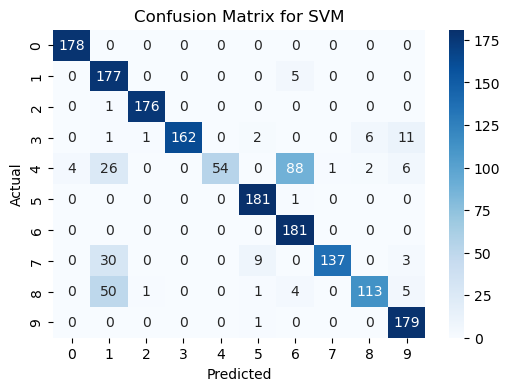

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {'kernel': ['linear', 'polynomial', 'rbf']}

# Initializing model
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, Y_train) # Finding best model param

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Y_pred = best_model.predict(X_test)
# Metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')


Y_pred = best_model.predict(X)
cm = confusion_matrix(Y, Y_pred)


# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title(f"Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")